In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from duckduckgo_search import ddg_images

In [2]:
colo_or_not = 'colonoscopy normal', 'random photos'
path = Path('colonoscopy_imgs')

In [3]:
path

Path('colonoscopy_imgs')

In [4]:
if not path.exists():
    path.mkdir()
    for o in colo_or_not:
        if o == 'colonoscopy normal':
            fold = 'colonoscopy'
            dest = (path/fold)
        else:
            fold = 'not_colonoscopy'
            dest = (path/fold)
        dest.mkdir(exist_ok=True)
        result = ddg_images(f'{o}')
        print(result)
        results = [i['image'] for i in result]
        download_images(dest, urls=results)
        print(results)

In [5]:
fns = get_image_files(path)
fns

(#166) [Path('colonoscopy_imgs/not_colonoscopy/earthworms_main.jpg'),Path('colonoscopy_imgs/not_colonoscopy/22613da3-36ed-4edb-ada8-bbfe7982093c.jpg'),Path('colonoscopy_imgs/not_colonoscopy/06059f5a-661d-4aaa-8181-d2827039e589.jpg'),Path('colonoscopy_imgs/not_colonoscopy/35a03e59-7fea-4482-9e5f-0bd899911d20.jpg'),Path('colonoscopy_imgs/not_colonoscopy/219ceb1a-56f6-4028-8b4f-19aac8d478f8.jpg'),Path('colonoscopy_imgs/not_colonoscopy/b0d82913-cd22-42f3-b0a0-75a89737ef87.jpg'),Path('colonoscopy_imgs/not_colonoscopy/1583621718525.png'),Path('colonoscopy_imgs/not_colonoscopy/30080a86-2ab9-47c6-940e-adf24b157448.jpg'),Path('colonoscopy_imgs/not_colonoscopy/2a423d49-163b-4b1d-b0d7-0cca54309995.jpg'),Path('colonoscopy_imgs/not_colonoscopy/d1637333-afb6-4186-b5d8-f50ad6126c87.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
failed.map(Path.unlink)

(#0) []

In [8]:
colos = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = colos.dataloaders(path)

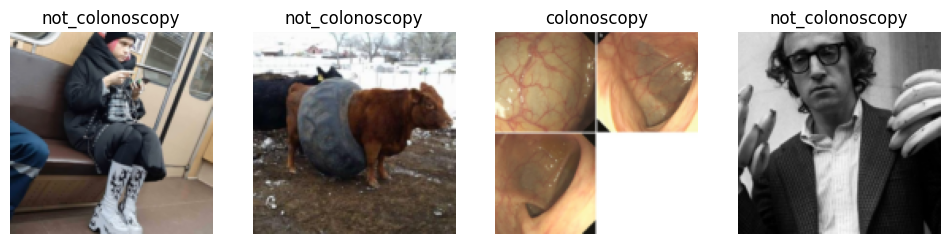

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

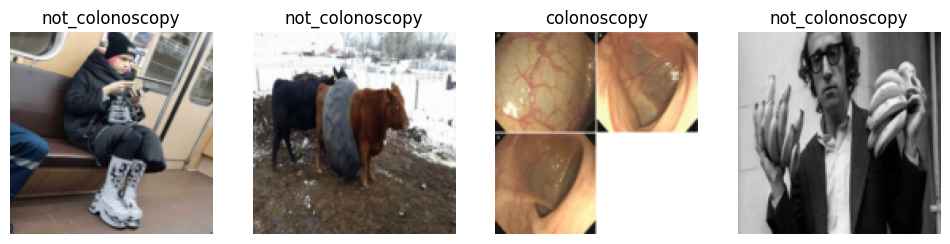

In [11]:
colos = colos.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = colos.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


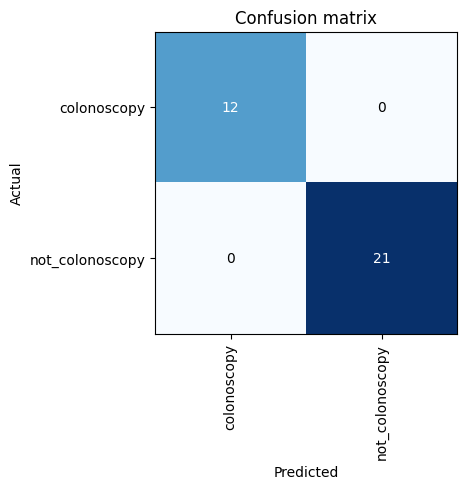

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
learn.export()

In [15]:
path = Path()
path.ls(file_exts='export2.pkl')

(#0) []